In [44]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [45]:
data_inactivity = pd.read_csv('inactivity.csv', usecols=['FIPS', '% INACTIVE']) #FIPDS
data_obesity = pd.read_csv('obesity.csv', usecols=['FIPS', '% OBESE'])
data_diabetes = pd.read_csv('diabetes.csv', usecols=['FIPS', '% DIABETIC',])

inac_ob = pd.merge(data_inactivity, data_obesity, on='FIPS', how='inner')

dataset = pd.merge(inac_ob, data_diabetes, on='FIPS', how='inner')



In [46]:
obes_data = data_obesity.iloc[:, 1].values #All rows, 1st column 
diab_data = data_diabetes.iloc[:, 1].values #All rows, 1st column 
inac_data = data_inactivity.iloc[:, 1].values #All rows, 1st column 

In [47]:
q1_inac = np.percentile(inac_data, 25)
q1_obes = np.percentile(obes_data, 25)
q1_diab = np.percentile(diab_data, 25)

median_inac = np.percentile(inac_data, 50)
median_obes = np.percentile(obes_data, 50)
median_diab = np.percentile(diab_data, 50)

q3_inac = np.percentile(inac_data, 75)
q3_obes = np.percentile(obes_data, 75)
q3_diab = np.percentile(diab_data, 75)

iqr_inac = q3_inac - q1_inac
iqr_obes = q3_obes - q1_obes
iqr_diab = q3_diab - q1_diab

lower_bound_inac = q1_inac - 1.5 * iqr_inac
lower_bound_obes = q1_obes - 1.5 * iqr_obes
lower_bound_diab = q1_diab - 1.5 * iqr_diab

upper_bound_inac = q1_inac + 1.5 * iqr_inac
upper_bound_obes = q1_obes + 1.5 * iqr_obes
upper_bound_diab = q1_diab + 1.5 * iqr_diab

for i in ["inac","obes", "diab"]:
    print('\n')
    print("First Quartile for " + i + "\t :", locals()[f"q1_{i}"])
    print("Median for " + i + "\t :", locals()[f"median_{i}"])
    print("Third Quartile for " + i+ "\t :", locals()[f"q3_{i}"])
    print("IQR for " + i+ "\t :", locals()[f"iqr_{i}"])
    print("Lowerbound for " + i+ "\t :", locals()[f"lower_bound_{i}"])
    print("Upper bound for " + i+ "\t :", locals()[f"upper_bound_{i}"])

# outliers = (data < lower_bound) | (data > upper_bound)
# filtered_inactivity_data = data[~outliers]
# This code calculates the five-number summary, computes the IQR, and filters out potential outliers based on a chosen threshold (in this case, 1.5 times the IQR). Adjust the threshold as needed based on the characteristics of your data and your goals for outlier removal.





First Quartile for inac	 : 15.0
Median for inac	 : 16.7
Third Quartile for inac	 : 18.1
IQR for inac	 : 3.1000000000000014
Lowerbound for inac	 : 10.349999999999998
Upper bound for inac	 : 19.650000000000002


First Quartile for obes	 : 17.9
Median for obes	 : 18.3
Third Quartile for obes	 : 19.0
IQR for obes	 : 1.1000000000000014
Lowerbound for obes	 : 16.249999999999996
Upper bound for obes	 : 19.55


First Quartile for diab	 : 7.3
Median for diab	 : 8.4
Third Quartile for diab	 : 9.7
IQR for diab	 : 2.3999999999999995
Lowerbound for diab	 : 3.7000000000000006
Upper bound for diab	 : 10.899999999999999


In [75]:
inac_column = dataset.iloc[:, 1]  # Extracting the inactivity percentage column
obes_column = dataset.iloc[:, 2]
diab_column = dataset.iloc[:, 3]
# Find outliers indices
outliers_inac = (inac_column < lower_bound_inac) | (inac_column > upper_bound_inac)
outliers_obes = (obes_column < lower_bound_obes) | (obes_column > upper_bound_obes)
outliers_diab = (diab_column < lower_bound_diab) | (diab_column > upper_bound_diab)

print(outliers_inac)
print(outliers_obes)
print(outliers_diab)

all_outliers = outliers_inac | outliers_obes | outliers_diab
print(all_outliers)

# Remove outliers
filtered_dataset = dataset.loc[~all_outliers]
filtered_dataset

0      False
1      False
2      False
3      False
4      False
       ...  
349    False
350    False
351    False
352    False
353    False
Name: % INACTIVE, Length: 354, dtype: bool
0      False
1      False
2      False
3      False
4      False
       ...  
349    False
350    False
351    False
352    False
353     True
Name: % OBESE, Length: 354, dtype: bool
0      False
1      False
2      False
3      False
4      False
       ...  
349    False
350    False
351    False
352    False
353    False
Name: % DIABETIC, Length: 354, dtype: bool
0      False
1      False
2      False
3      False
4      False
       ...  
349    False
350    False
351    False
352    False
353     True
Length: 354, dtype: bool


,FIPS,% INACTIVE,% OBESE,% DIABETIC
0,1011,17.0,18.7,9.4
1,2068,16.2,18.9,6.8
2,2105,15.0,19.4,7.3
3,2195,17.8,17.2,9.2
4,2230,15.8,18.3,6.6
...,...,...,...,...
348,51181,15.7,19.0,7.9
349,51820,16.6,19.5,8.6
350,51830,15.7,18.0,8.5
351,51840,16.1,19.4,6.9


In [49]:
X = filtered_dataset.iloc[:, 1:-1].values
y = filtered_dataset.iloc[:, -1].values

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [69]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_reg = PolynomialFeatures(degree = 3)
X_poly = poly_reg.fit_transform(X_train)
regressor = LinearRegression()
regressor.fit(X_poly, y_train)

LinearRegression()

In [70]:
y_pred_train = regressor.predict(poly_reg.transform(X_train))
y_pred_test = regressor.predict(poly_reg.transform(X_test))
# np.set_printoptions(precision=2)
# print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

Text(0.5, 1.0, 'Actual vs Predicted Diabetes Percentage (Training Data)')

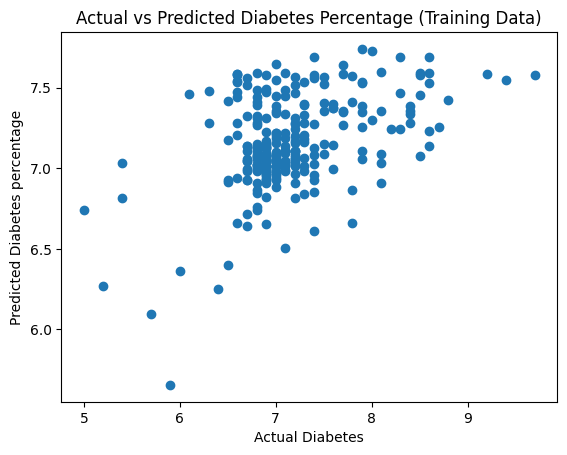

In [71]:
import matplotlib.pyplot as plt

plt.scatter(y_train, y_pred_train)
plt.xlabel("Actual Diabetes")
plt.ylabel("Predicted Diabetes percentage")
plt.title("Actual vs Predicted Diabetes Percentage (Training Data)")

In [72]:
from sklearn.metrics import r2_score
r2_score(y_train, y_pred_train)

0.2071205294483034

Text(0.5, 1.0, 'Actual vs Predicted Diabetes Percentage (Testing Data)')

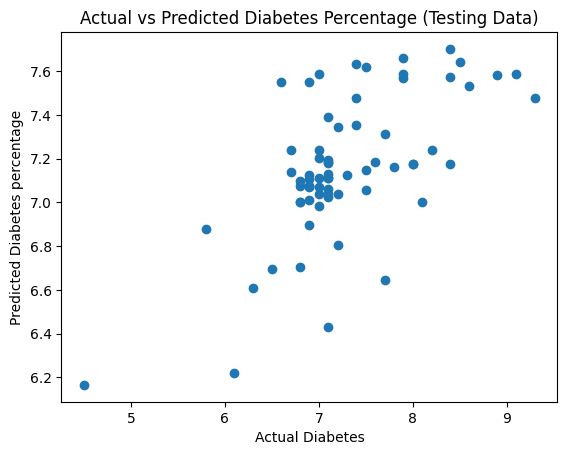

In [73]:
plt.scatter(y_test, y_pred_test)
plt.xlabel("Actual Diabetes")
plt.ylabel("Predicted Diabetes percentage")
plt.title("Actual vs Predicted Diabetes Percentage (Testing Data)")

In [74]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_test)

0.3443396860438963